# Fondamenti di Analisi Dati - Spambase
## Rosario Scavo (1000037803)

The dataset can be downloaded from here:
http://archive.ics.uci.edu/dataset/94/spambase

## Table of Contents:
* [Dataset description](#data-description)
  * [Attribute description](#attribute-description)
* [Dataset Analysis](#data-analysis)
  * [Dataset integrity](#data-integrity)
  * [Descriptive statistics](#descriptive-statistics)
    * [Histogram distributions](#histograms-distribution)
    * [Word frequencies](#word-frequencies)
    * [Feature ratios](#feature-ratios)
    * [Hypothesis testing (chi-square test) on features](#hypothesis-testing)
  * [Outlier Analysis](#outlier-analysis)
    * [Word frequencies](#Word-frequencies)
    * [Character frequencies](#character-frequencies)
    * [Capital Run frequencies](#capital-run-frequencies)
    * [Interquartile Range (IQR) Analysis](#iqr)
  * [Multicollinearity](#multicollinearity)

# Dataset description <a id="data-description"></a>

The dataset includes various types of content that fall under the category of "spam", such as advertisements, chain letters, make-money-fast schemes, and pornography. The spam emails were collected from individuals who reported spam and the postmaster. On the other hand, non-spam emails were collected from personal and work files, where the presence of the word 'george' and the area code '650' were used as indicators of non-spam.

The central goal is to establish a classification rule to identify spam messages based on the frequency of specific words, numbers, characters, or consecutive capital letters in phrases. We will utilize various classification algorithms, including logistic regression (LR), Decision-Tree, and K-nearest neighbors algorithm (KNN), K-Means, to achieve this. These algorithms will be optimized through appropriate data preparation, transformation, and hyperparameter tuning using built-in Python functions. Additionally, we will determine the appropriate metrics to maximize and their impact on classification performance.

However, effective implementation requires thorough data analysis. Without prior data understanding, employing classifiers becomes challenging, if not impossible. This analysis will involve attribute exploration, variable type verification, missing value identification, feature-level metric analysis (mean, standard deviation, quantiles, etc.), feature importance determination for spam/non-spam classification, and outlier detection and analysis.

In [356]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import chi2_contingency


In [292]:
names_list_filepath = 'spambase/names.txt'
attribute_names = []

with open(names_list_filepath, 'r') as file:
    attribute_names = file.read().splitlines()

data = pd.read_csv('spambase/spambase.data', names=attribute_names)
data

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Attribute description <a id="attribute-description"></a>
- The last column of 'spambase.data' (**Class**) indicates whether the email was considered spam (1) or not (0), i.e., unsolicited commercial email.
- Most attributes indicate whether a specific word or character frequently occurs in the email.
- Attributes 55-57 (*run-length* attributes) measure the length of sequences of consecutive capital letters.

### Definitions of Attributes:
1. **48 continuous real [0,100] attributes of type `word_freq_WORD`:**
   - Percentage of words in the email that match the specified word. 
   - Calculation: $\frac{100 \times (\text{Number of times the word appears in the email})}{\text{Total number of words in the email}}$


2. **6 continuous real [0,100] attributes of type `char_freq_CHAR`:**
   - Percentage of characters in the email that match the specified character.
   - Calculation: 100 * (number of occurrences of the character) / total characters in the email.

3. **1 continuous real [1,...] attribute of type `capital_run_length_average`:**
   - Average length of uninterrupted sequences of capital letters.

4. **1 continuous integer [1,...] attribute of type `capital_run_length_longest`:**
   - Length of the longest uninterrupted sequence of capital letters.

5. **1 continuous integer [1,...] attribute of type `capital_run_length_total`:**
   - Sum of the length of uninterrupted sequences of capital letters.
   - Total number of capital letters in the email.

6. **1 nominal {0,1} class attribute of type `spam`:**
   - Denotes whether the email was considered spam (1) or not (0), i.e., unsolicited commercial email.


In [252]:
data.keys()

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


- **Number of instances:** 4601, of which 1813 are SPAM (39.4%)
- **Number of attributes:** 58 (57 continuous, 1 categorical representing the class label).

In [253]:
class_counts = data['Class'].value_counts()
print(class_counts)
print("\n")
data.info()

Class
0    2788
1    1813
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non

# Dataset analysis <a id="data-analysis"></a>

## Dataset integrity <a id="data-integrity"></a>

Before analyzing the data, let's verify that the 'Class' attribute only contains the values 1 and 0. Additionally, we will check for any NaN values in the dataset.

In [254]:
data['Class'].unique()

array([1, 0])

In [255]:
count_nan_in_df = data.isnull().sum().sum()
print(f'Number of NaN values: {count_nan_in_df}')

Number of NaN values: 0


For simplicity, we will change the class type to bool and rename it to 'spam.' Consequently, when a record has `spam=True`, it indicates that the email is spam.

In [293]:
data['spam'] = data['Class'].astype(bool)
data = data.drop(columns=['Class'])
data['spam']

0        True
1        True
2        True
3        True
4        True
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Name: spam, Length: 4601, dtype: bool

Utilizing the `describe` function's min and max lines, which provide insights into the minimum and maximum values for each column, we can confirm that the values of attributes indicating frequencies adhere to the established ranges. Specifically, the lower limit of the range is duly respected, while the upper limit is one unit higher due to the multiplication of frequencies by 100 (percentage), as explained earlier.

### Issue: Matrix Sparsity

However, a notable observation is that all quartile values are zero. This phenomenon arises from the inherent sparsity of the matrix, where numerous frequency-related values are zero in the majority of records. Consequently, the data is concentrated near zero, introducing noise that could potentially compromise the statistical analysis of the dataset.

To address this issue, in a later stage of the project, a decision was made to replace values equal to 0.0 with NaN for attributes indicating frequencies. This strategic move aimed to mitigate the impact of matrix sparsity, enhancing the dataset's suitability for robust statistical analysis.


In [257]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


In [258]:
data[data['spam'] == True].iloc[:, 0:-4].max()

word_freq_make           4.540
word_freq_address        4.760
word_freq_all            3.700
word_freq_3d            42.810
word_freq_our            7.690
word_freq_over           2.540
word_freq_remove         7.270
word_freq_internet      11.110
word_freq_order          3.330
word_freq_mail           7.550
word_freq_receive        2.610
word_freq_will           6.250
word_freq_people         5.550
word_freq_report         4.760
word_freq_addresses      4.410
word_freq_free          16.660
word_freq_business       7.140
word_freq_email          9.090
word_freq_you           12.500
word_freq_credit        18.180
word_freq_your          11.110
word_freq_font          17.100
word_freq_000            5.450
word_freq_money         12.500
word_freq_hp             3.580
word_freq_hpl            1.770
word_freq_george         1.280
word_freq_650            9.090
word_freq_lab            0.470
word_freq_labs           3.380
word_freq_telnet         1.360
word_freq_857            0.470
word_fre

In [259]:
data.iloc[:, :-4] /= 100
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.001046,0.002130,0.002807,0.000654,0.003122,0.000959,0.001142,0.001053,0.000901,0.002394,...,0.000319,0.000386,0.001390,0.000170,0.002691,0.000758,0.000442,5.191515,52.172789,283.289285
std,0.003054,0.012906,0.005041,0.013952,0.006725,0.002738,0.003914,0.004011,0.002786,0.006448,...,0.002857,0.002435,0.002704,0.001094,0.008157,0.002459,0.004293,31.729449,194.891310,606.347851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000650,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000
75%,0.000000,0.000000,0.004200,0.000000,0.003800,0.000000,0.000000,0.000000,0.000000,0.001600,...,0.000000,0.000000,0.001880,0.000000,0.003150,0.000520,0.000000,3.706000,43.000000,266.000000
max,0.045400,0.142800,0.051000,0.428100,0.100000,0.058800,0.072700,0.111100,0.052600,0.181800,...,0.100000,0.043850,0.097520,0.040810,0.324780,0.060030,0.198290,1102.500000,9989.000000,15841.000000


## Descriptive statistics <a id="descriptive statistics"></a>

Emails can be categorized into two groups: spam and non-spam. To better understand these categories, it is important to calculate fundamental statistics for each group. Furthermore, we aim to pinpoint specific characteristics that could significantly influence the classification of an email.

In [260]:
spam = data[data['spam'] == True]
non_spam = data[data['spam'] == False]

In [261]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,...,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000,1813.000000
mean,0.001523,0.001646,0.004038,0.001647,0.005140,0.001749,0.002754,0.002081,0.001701,0.003505,...,0.000021,0.000206,0.001090,0.000082,0.005137,0.001745,0.000789,9.519165,104.393271,470.619415
std,0.003106,0.003489,0.004807,0.022191,0.007072,0.003219,0.005721,0.005449,0.003548,0.006314,...,0.000268,0.000916,0.002821,0.000474,0.007442,0.003605,0.006119,49.846186,299.284969,825.081179
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000940,0.000000,0.000000,2.324000,15.000000,93.000000
50%,0.000000,0.000000,0.003000,0.000000,0.002900,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000650,0.000000,0.003310,0.000800,0.000000,3.621000,38.000000,194.000000
75%,0.001700,0.002100,0.006400,0.000000,0.007800,0.002400,0.003400,0.001900,0.001900,0.005100,...,0.000000,0.000000,0.001440,0.000000,0.006450,0.002110,0.000180,5.708000,84.000000,530.000000
max,0.045400,0.047600,0.037000,0.428100,0.076900,0.025400,0.072700,0.111100,0.033300,0.075500,...,0.007700,0.011170,0.097520,0.011710,0.078430,0.060030,0.198290,1102.500000,9989.000000,15841.000000


In [262]:
non_spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,...,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000
mean,0.000735,0.002445,0.002006,0.000009,0.001810,0.000445,0.000094,0.000384,0.000380,0.001672,...,0.000512,0.000503,0.001586,0.000227,0.001100,0.000116,0.000217,2.377301,18.214491,161.470947
std,0.002978,0.016332,0.005030,0.000213,0.006145,0.002229,0.001105,0.002472,0.001985,0.006432,...,0.003652,0.003034,0.002606,0.001349,0.008209,0.000696,0.002439,5.113685,39.084792,355.738403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.384000,4.000000,18.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000645,0.000000,0.000000,0.000000,0.000000,1.857000,10.000000,54.000000
75%,0.000000,0.000000,0.001200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002220,0.000000,0.000270,0.000000,0.000000,2.555000,18.000000,141.000000
max,0.043400,0.142800,0.051000,0.008700,0.100000,0.058800,0.030700,0.058800,0.052600,0.181800,...,0.100000,0.043850,0.052770,0.040810,0.324780,0.020380,0.074070,251.000000,1488.000000,5902.000000


### Histograms distribution <a id="histograms-distribution"></a>

Histograms visually represent the distribution of values within each feature, providing valuable insights into the patterns and tendencies associated with spam and non-spam emails. By scrutinizing these histograms, one can discern any differences in the distributions, thereby gaining valuable insights into the characteristic features that distinguish spam from legitimate messages. For instance, when comparing `word_freq_business` with `word_freq_3d`, it is clear that the latter is a good feature for discriminating between spam and nonspam.

In [263]:
def plot_histogram(feature, spam, non_spam):
    plt.hist(spam[feature], bins=20, alpha=0.5, label='Spam')
    plt.hist(non_spam[feature], bins=20, alpha=0.5, label='Non-Spam')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature} for Spam and Non-Spam Emails')
    plt.legend()
    plt.show()

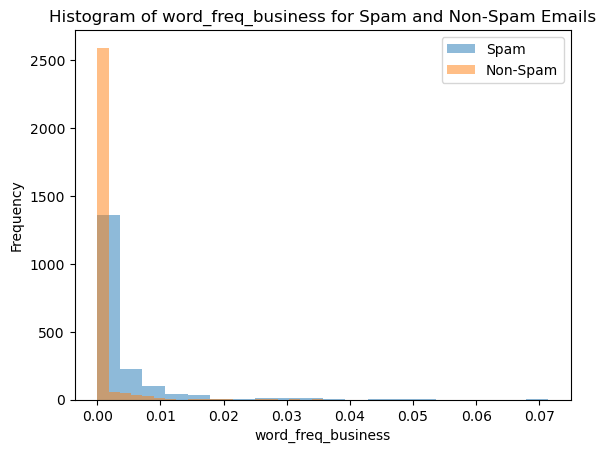

In [264]:
plot_histogram('word_freq_business', spam, non_spam)

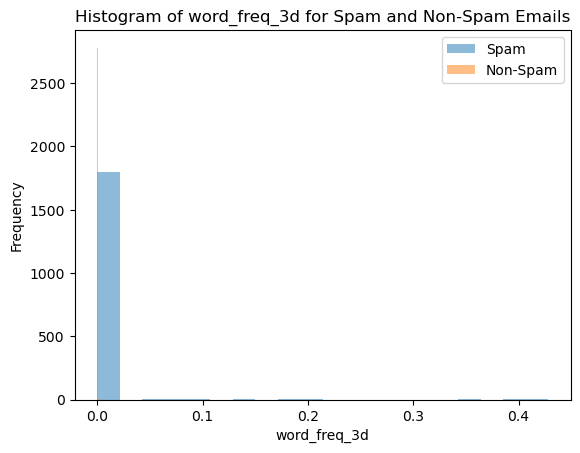

In [265]:
plot_histogram('word_freq_3d', spam, non_spam)

### Word frequencies <a id="word-frequencies"></a>

Certain columns showcase markedly higher maximum values within one class, in contrast with relatively lower values in the counterpart class. These observations provide valuable insights into potential discriminative features crucial for email classification.

In order to identify influential features impacting email classification, we scrutinize the features by averaging the values of the word frequencies and plotting them.

In [266]:
mean_wf = data.groupby('spam').mean()
mean_wr_fr = mean_wf.iloc[:, 0:-9]
nospam_wr_fr = mean_wr_fr.iloc[0]
spam_wr_fr = mean_wr_fr.iloc[1]

The initial graph presented here juxtaposes the average word frequency values in spam (depicted in orange) and non-spam emails (depicted in blue). Notably, certain words like "3d" (as shown previously) and "you" exhibit higher average frequencies in **SPAM emails**, while others like "hp," "address," "font," and "george" are more prevalent in **non-spam emails**. This suggests that the frequency of specific words plays a key role in email classification.

Following a similar approach, I extended the analysis to focus on the frequencies of special characters. It is commonly observed that non-spam emails tend to display a significant presence of such characters.

This comparative analysis provides valuable insights into the distinctive word and character frequency patterns between spam and non-spam emails, contributing to a better understanding of classification dynamics.


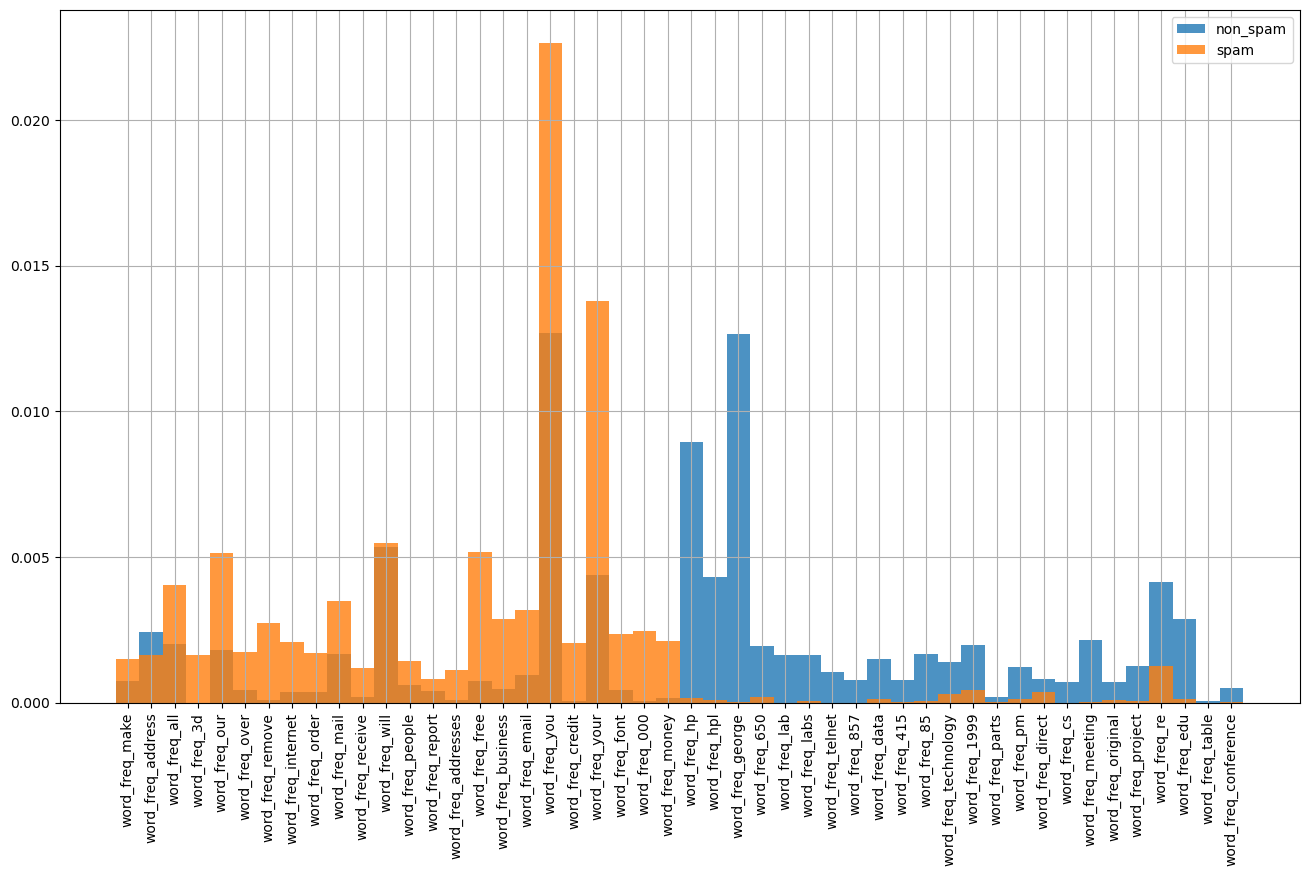

In [267]:
plt.figure(figsize=(16, 9))
plt.bar(nospam_wr_fr.index, nospam_wr_fr.values, width=1, alpha=0.8)
plt.bar(spam_wr_fr.index, spam_wr_fr.values, width=1, alpha=0.8)
plt.xticks(rotation='vertical')
plt.legend(['non_spam', 'spam'])
plt.grid()
plt.show()

### Feature ratios <a id="feature-ratios"></a>
In order to select influential features impacting email classification, we scrutinize the features by averaging the values within the Spambase dataset and assessing the ratios between spam and non-spam emails. We show only the features greater than the average of the ratio.

In [268]:
spam_mean = spam.mean()
non_spam_mean = non_spam.mean()
spam_diff = pd.concat(
    [spam_mean, non_spam_mean, spam_mean/non_spam_mean], axis=1)
# remove last row (spam column)
spam_diff = spam_diff[:-1]
spam_diff.columns = ['Spam', 'Non-Spam', 'Ratio']

spam_diff.sort_values(by='Ratio', ascending=False, inplace=True)

In [269]:
spam_diff_mean = spam_diff['Ratio'].mean()
selected_spam_diff = spam_diff[spam_diff['Ratio'] > spam_diff_mean]
selected_spam_diff

,Spam,Non-Spam,Ratio
word_freq_3d,0.001647,0.000009,185.872477
word_freq_000,0.002471,0.000071,34.857704
word_freq_remove,0.002754,0.000094,29.351310
word_freq_credit,0.002055,0.000076,27.117520
char_freq_$,0.001745,0.000116,14.978608
word_freq_addresses,0.001121,0.000083,13.474663
word_freq_money,0.002129,0.000171,12.421667


We can plot the distribution of the ratios to have a better idea.

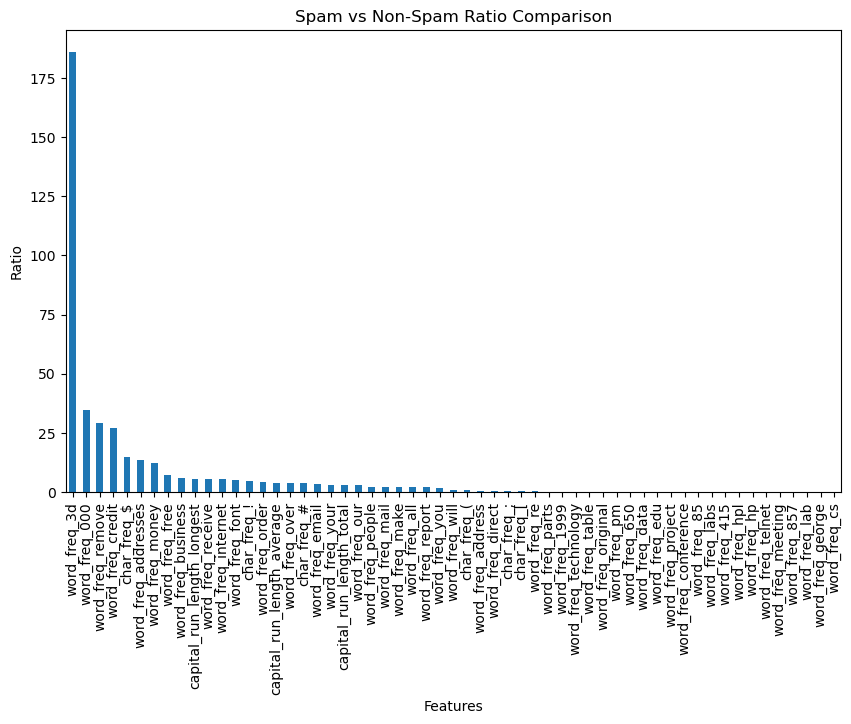

In [270]:
spam_diff['Ratio'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Features')
plt.ylabel('Ratio')
plt.title('Spam vs Non-Spam Ratio Comparison')
plt.show()

In [271]:
spam_indicators = list(selected_spam_diff.index.values)
spam_indicators.append('spam')
spam_indicators

['word_freq_3d',
 'word_freq_000',
 'word_freq_remove',
 'word_freq_credit',
 'char_freq_$',
 'word_freq_addresses',
 'word_freq_money',
 'spam']

Upon closer examination of certain word pairs, a discernible trend emerges: the joint appearance of both words in an email often suggests a higher likelihood of it being classified as spam. Furthermore, there is an intriguing correlation with word frequency, where a higher frequency is indicative of a higher likelihood of the email being categorized as spam.

In [272]:
%%warnings ignore

pair_spam = sns.pairplot(data[spam_indicators].iloc[::-1], hue="spam")
pair_spam.fig.suptitle('SPAM indicators', y=1.01, fontsize=20)

UsageError: Cell magic `%%warnings` not found.


#### Hypothesis testing (chi-square test) on features <a id="hypothesis-testing"></a>

The p-values obtained through the chi-square test serve as crucial indicators in understanding the relationship between the examined feature (independent variable) and the target variable 'spam.' The null hypothesis, in this context, posits no association or difference between the feature and the likelihood of an email being classified as spam.

##### Interpretation Guidelines:

- **Small p-value (e.g., < 0.05):**
  - **Conclusion:** Reject the null hypothesis.
  - **Implication:** Strong evidence exists, suggesting an association or difference between the feature and the 'spam' variable. The feature is likely to be statistically significant in predicting spam.

- **Large p-value (e.g., > 0.05):**
  - **Conclusion:** Fail to reject the null hypothesis.
  - **Implication:** Insufficient evidence to conclude an association or difference between the feature and the 'spam' variable. The feature may not be statistically significant in predicting spam.

A commonly used significance level (alpha) is 0.05. If a p-value is less than or equal to alpha, the null hypothesis is rejected. Careful consideration of these p-values allows the identification of features that play a significant role in predicting spam.

To calculate the p-values we can engage the **Chi-Square Test:**

The Chi-Square test is a statistical method used to determine if there is a significant association between two categorical variables. It compares the observed distribution of categorical data with the distribution that would be expected if the variables were independent. The test yields a p-value, indicating the probability of obtaining the observed distribution by chance.

**Formula:**

The Chi-Square test statistic (χ²) is calculated using the formula:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $$

where:
- $O_i$ is the observed frequency in each category,
- $E_i$ is the expected frequency in each category assuming independence.

The test compares the sum of squared differences between observed and expected frequencies, normalized by the expected frequencies. A higher Chi-Square value suggests a greater difference between observed and expected values, and a lower p-value indicates stronger evidence against the null hypothesis of independence.


In [273]:
p_values = {}
for column in data.columns[:-1]:
    contingency_table = pd.crosstab(data[column], data['spam'])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    p_values[column] = round(p_value, 5)

In [274]:
pd.crosstab(data['capital_run_length_total'], data['spam'])

spam,False,True
capital_run_length_total,,
1,9,0
2,8,5
3,31,1
4,46,1
5,114,1
...,...,...
9088,0,1
9090,0,1
9163,0,1


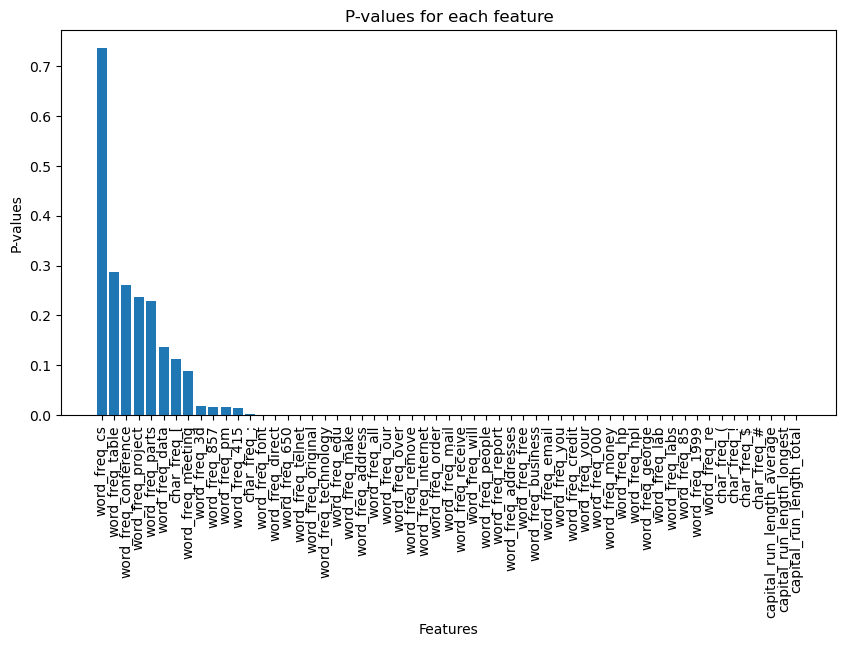

In [275]:
sorted_p_values = dict(
    sorted(p_values.items(), key=lambda item: float(item[1]), reverse=True))
keys = sorted_p_values.keys()
values = [float(v) for v in sorted_p_values.values()]

plt.figure(figsize=(10, 5))
plt.bar(keys, values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('P-values')
plt.title('P-values for each feature')
plt.show()

Features with Higher P-Values:

- **word_freq_cs (0.73532)**
- **word_freq_table (0.28752)**
- **word_freq_conference (0.25999)**
- **word_freq_project (0.23742)**
- **word_freq_parts (0.22839)**
- **word_freq_data (0.13572)**
- **char_freq_[ (0.11276)**
- **word_freq_meeting (0.08921)**

These results suggest that the mentioned features may not be as discriminatory in identifying spam emails compared to others. Notably, features selected previously as spam indicators, such as 'word_freq_3d,' 'word_freq_remove,' 'word_freq_addresses,' 'word_freq_credit,' 'word_freq_000,' 'word_freq_money,' and 'char_freq_$,' are conspicuously absent from the list. This absence indicates their potential efficacy as strong indicators of spam emails in the Spambase dataset.

In [276]:
p_value_threshold = 0.05
non_significant_indicators = {
    k: v for k, v in sorted_p_values.items() if v > p_value_threshold}
non_significant_indicators

{'word_freq_cs': 0.73532,
 'word_freq_table': 0.28752,
 'word_freq_conference': 0.25999,
 'word_freq_project': 0.23742,
 'word_freq_parts': 0.22839,
 'word_freq_data': 0.13572,
 'char_freq_[': 0.11276,
 'word_freq_meeting': 0.08921}

In [277]:
spam_indicators = spam_indicators[:-1]
spam_indicators

['word_freq_3d',
 'word_freq_000',
 'word_freq_remove',
 'word_freq_credit',
 'char_freq_$',
 'word_freq_addresses',
 'word_freq_money']

## Outlier Analysis <a id="outlier-analysis"></a>
In our exploration of the Spambase dataset, we aimed to identify outliers and understand their impact on the data. Initially, we plotted a boxplot for all the word frequency features, disregarding the distinction between spam and non-spam emails. This allowed us to observe the overall distribution of the data and identify potential outliers.

In [286]:
data_wr_fr = data.iloc[:, :-10]
data_char_freq = data.iloc[:, -10:-4]
data_capital_run = data.iloc[:, -4:-1]

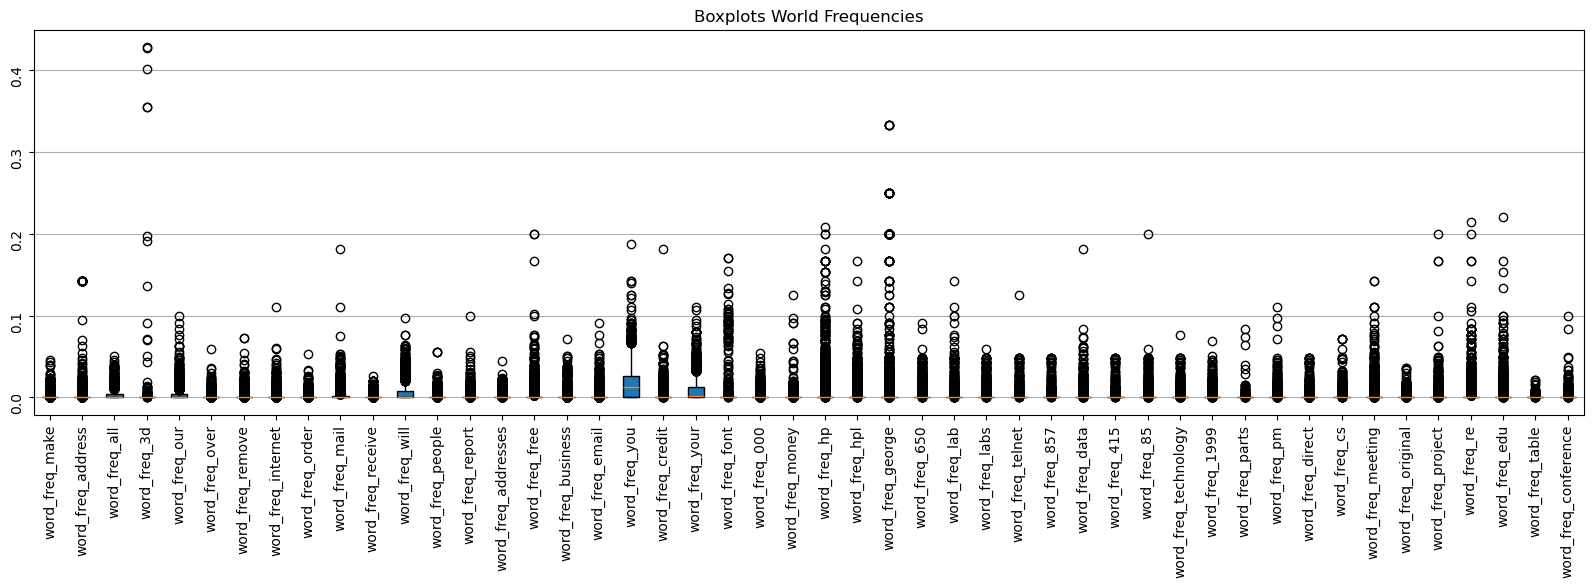

In [279]:
def draw_boxplot(ax, label, data):
    ax.boxplot(data,
               vert=True,
               patch_artist=True,
               labels=data.columns)
    ax.set_title(label)
    ax.yaxis.grid(True)
    ax.tick_params(labelrotation=90)

fig, ax = plt.subplots(figsize=(20, 5))
draw_boxplot(ax, 'Boxplots Word Frequencies', data_wr_fr)
plt.show()

### Word frequencies <a id="Word-frequencies"></a>
To gain a deeper understanding of outliers within each class, we opted to create separate boxplots for spam and non-spam emails. This more nuanced approach allows us to discern specific characteristics within each category and better comprehend the distinctions in outliers between spam and non-spam instances.

* **Symmetry Differences:**
   - The symmetry of the same feature differs between spam and non-spam classes. For instance, consider `word_freq_george`, a feature used to label non-spam emails. The asymmetry suggests that this feature may not exhibit similar behavior across both classes.

* **Distinctive Spam Features:**
   - Certain features, such as `word_freq_3d` and `word_freq_credit`, clearly stand out as potential indicators for classifying spam emails. These features demonstrate notable differences between spam and non-spam distributions, as previously stated.

* **Potential Non-Spam Indicators:**
   - In examining boxplots for non-spam emails, features like `word_freq_hp`, `word_freq_lab`, and `word_freq_meeting` emerge as potential indicators. Notably, non-spam distributions seem to harbor more outliers, suggesting potential discriminative power in these features.

* **Common Minimal Value:**
   - It's important to note that each boxplot has a minimum value of 0, reflecting the inherent nature of the features, which are always positive.

These insights derived from the boxplots contribute to a nuanced understanding of feature behaviors within spam and non-spam categories, aiding in the identification of key indicators for effective email classification.


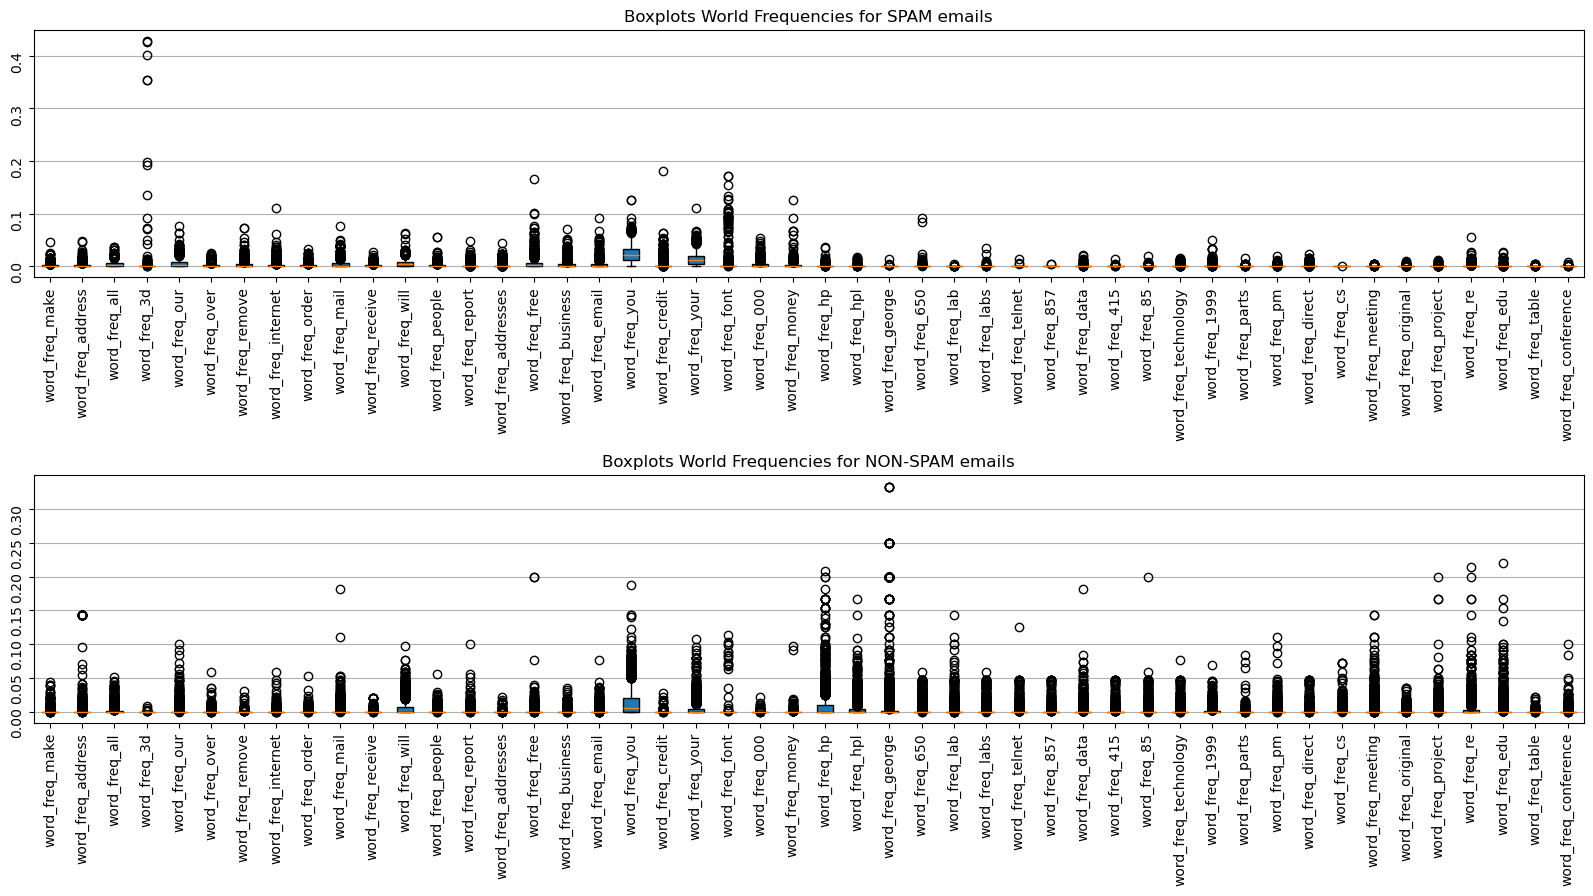

In [280]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20, 9))
draw_boxplot(ax1, 'Boxplots Word Frequencies for SPAM emails', data_wr_fr[data['spam']==True])
draw_boxplot(ax2, 'Boxplots Word Frequencies for NON-SPAM emails', data_wr_fr[data['spam']==False])
fig.subplots_adjust(hspace=0.8)
plt.show()

### Character frequencies <a id="character-frequencies"></a>

Observing the outlier distributions concerning the frequency of certain characters, notable distinctions emerge:

1. **`char_freq_$`:**
   - A noticeable difference in distribution is observed between spam and non-spam emails for `char_freq_$`. This discrepancy aligns with the common practice in spam emails, where fraudulent messages often involve mentions of free offerings (0$) or repetitive use of symbols like $$$.

2. **`char_freq_;`:**
   - Another significant feature is `char_freq_;`, which displays a correlation with non-spam emails beyond a certain frequency threshold. This correlation is logical as the presence of `;` is often associated with well-organized text (oppositely to this report :/)

##### General Observation on Outliers:

In summary, outliers in our dataset carry informative value and contribute to the classification process. Notably, features like `char_freq_$` and `char_freq_;` showcase distinctive patterns between spam and non-spam emails. Consequently, the decision has been made not to remove any outliers from our data.

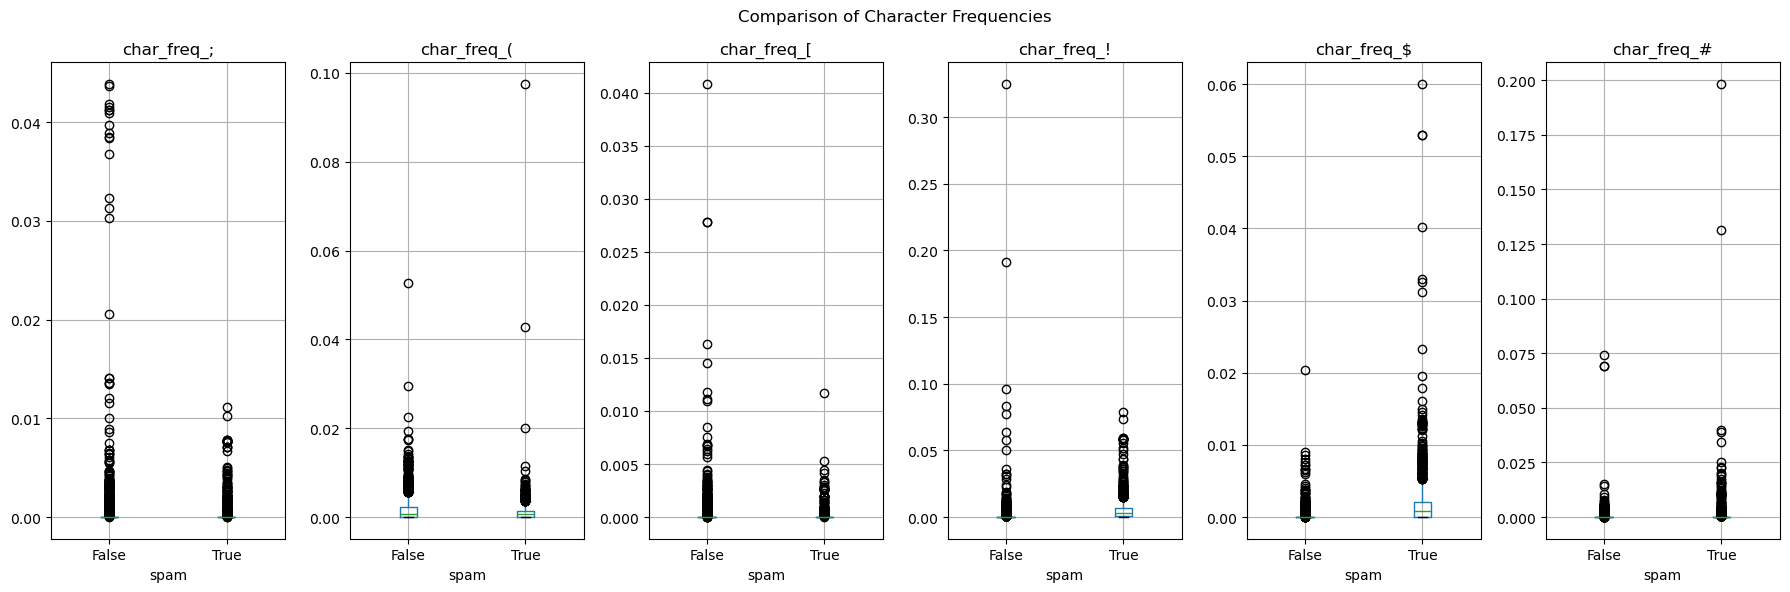

In [281]:
char_freq_cols = data_char_freq.columns
fig, axes = plt.subplots(1, len(char_freq_cols), figsize=(18, 6))

for i, col in enumerate(char_freq_cols):
    data.boxplot(by='spam', column=col, ax=axes[i])
    axes[i].set_title(col)
    
fig.suptitle('Comparison of Character Frequencies')
plt.tight_layout()
plt.show()

### Capital Run frequencies <a id="capital-run-frequencies"></a>
We also investigated the role of capital letters in distinguishing between spam and non-spam emails. Notably, the feature `capital_run_length_average` caught our interest, as it represents the average length of consecutive sequences of capital letters in an email. This metric proved to be a valuable indicator, showcasing a higher average presence of consecutive capital letters in spam emails compared to non-spam counterparts.

Upon visualizing the data, we observed that spam emails exhibit a tendency towards longer consecutive sequences of capital letters, suggesting a potential pattern that could aid in classification.

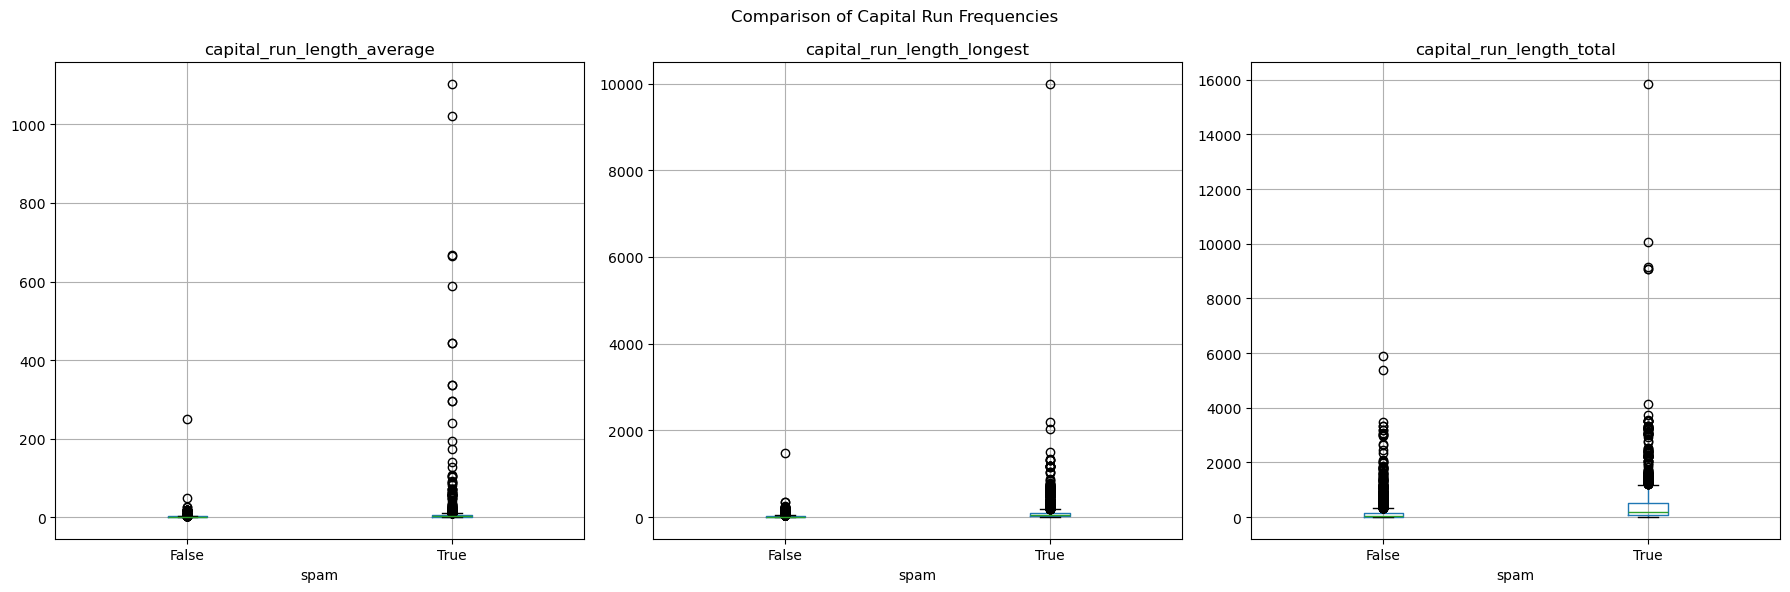

In [287]:
data_capital_run = data_capital_run.columns
fig, axes = plt.subplots(1, len(data_capital_run), figsize=(18, 6))

for i, col in enumerate(data_capital_run):
    data.boxplot(by='spam', column=col, ax=axes[i])
    axes[i].set_title(col)
    
fig.suptitle('Comparison of Capital Run Frequencies')
plt.tight_layout()
plt.show()

### Interquartile Range (IQR) Analysis <a id="iqr"></a>

The Interquartile Range (IQR) serves as a crucial measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) within a dataset. It provides insights into the spread of the middle 50% of the data.

#### Interpreting the Values:
- Each column in `iqr_df` corresponds to a feature from the dataset.
- A larger IQR suggests a greater variability in the middle 50% of the data for a specific feature.
- A small IQR indicates that the central portion of the data is concentrated in a narrow range.
- By comparing IQR values between "spam" and "non_spam," we can identify features where the spread of data significantly differs for the two categories.

#### Example Interpretation:

For instance, if `iqr_df` indicates that the IQR for feature X is substantially larger in the "spam" category compared to the "nospam" category, it suggests that the spread of values for feature X is more diverse among spam instances.

This IQR analysis provides valuable insights into the distributional differences within numerical features, aiding in the identification of characteristics that may contribute to the classification of spam and non-spam instances.

In [335]:
columns = data.iloc[:, :-1].columns
spam_iqr = []
non_spam_iqr = []
for col in columns:
    spam_q1,spam_q3 = data[data['spam']==True][col].quantile([1/4,3/4])
    non_spam_q1, non_spam_q3 = data[data['spam']==False][col].quantile([1/4,3/4])
    spam_iqr.append(spam_q3-spam_q1)
    non_spam_iqr.append(non_spam_q3-non_spam_q1)

iqr_df = pd.DataFrame([spam_iqr, non_spam_iqr], columns=columns, index=["spam", "non_spam"])
iqr_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
spam,0.17,0.21,0.64,0.0,0.78,0.24,0.34,0.19,0.19,0.51,...,0.0,0.0,0.144,0.0,0.551,0.211,0.018,3.384,69.0,437.00
non_spam,0.00,0.00,0.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.222,0.0,0.027,0.000,0.000,1.171,14.0,122.25


The observed values in our analysis further confirm the earlier assertions regarding features that appear to be particularly informative in discerning between spam and non-spam emails. Notably, features such as `capital_run_length_total,` `word_freq_free,` and others exhibit noticeable distinctions in their Interquartile Range (IQR) values when stratified by the spam and non-spam classes.

The IQR, a measure of statistical dispersion, provides insight into the data spread within each class. The discernible differences in IQR values between spam and non-spam instances for specific features suggest that these variables carry significant discriminatory potential. For instance, `capital_run_length_total` indicates a variance in the total length of consecutive capital letters, while `word_freq_free` reflects the frequency of the word "free" in the email.

These findings reinforce the hypothesis that certain features possess inherent patterns or characteristics that contribute significantly to classifying emails into spam or non-spam categories.

In [355]:
iqr_df.loc['abs_diff'] = abs(iqr_df.loc["non_spam"] - iqr_df.loc["spam"])
iqr_df_transposed = iqr_df.T
iqr_df_transposed[iqr_df_transposed['abs_diff']>0].sort_values(by='abs_diff', ascending=False)

,spam,non_spam,abs_diff
capital_run_length_total,437.000,122.2500,314.7500
capital_run_length_longest,69.000,14.0000,55.0000
capital_run_length_average,3.384,1.1710,2.2130
word_freq_your,1.490,0.4600,1.0300
word_freq_hp,0.000,1.0000,1.0000
word_freq_our,0.780,0.0000,0.7800
word_freq_free,0.640,0.0000,0.6400
char_freq_!,0.551,0.0270,0.5240
word_freq_all,0.640,0.1200,0.5200
word_freq_mail,0.510,0.0000,0.5100


## Multicollinearity <a id="multicollinearity"></a>

Before starting with the classification methods, as we studied the subject, we should address a potential issue in our dataset: **multicollinearity**. Multicollinearity occurs when independent variables in a multiple regression model display high correlations among themselves. This correlation between independent variables (our features) can pose challenges in distinguishing the individual effects of these features on the dependent variable (the class of the email, spam, or non-spam). In such cases, we can try to remove the correlated variables (we can identify correlated variables with the `correlation matrix`, by plotting an heatmap), apply some feature selection method or perform Principal Component Analysis (PCA).

## Analyzing Correlations in the Spambase Dataset

In this analysis of the Spambase dataset, we aim to uncover potential relationships and dependencies between different parameters by utilizing a correlation matrix. A correlation matrix is a tabular representation of correlation coefficients between variables in a dataset. The correlation coefficient quantifies the strength and direction of a linear relationship between two variables. In this specific investigation, we choose to employ the Kendall correlation coefficient as opposed to Pearson, considering the presence of outliers in the dataset. The **Kendall correlation coefficient** is particularly robust in scenarios with outliers and non-normally distributed data. It measures the strength of dependence between two variables by comparing the number of concordant and discordant pairs of observations. The formula for calculating the Kendall correlation coefficient, denoted as $\tau$, is as follows:

$$\tau = \frac{{\text{{Number of concordant pairs}} - \text{{Number of discordant pairs}}}}{{\text{{Total number of pairs}}}}$$

Here, concordant pairs are those with the same order of ranks in both variables, while discordant pairs have different orderings. By employing the Kendall correlation coefficient, we aim to gain insights into potential associations among the parameters in the Spambase dataset while accounting for its unique characteristics, including the presence of outliers.

In [365]:
new_df.shape

(4601, 57)

In [361]:
new_df = data.iloc[:, :-1]
mask = np.zeros_like(new_df.corr(method='spearman'))

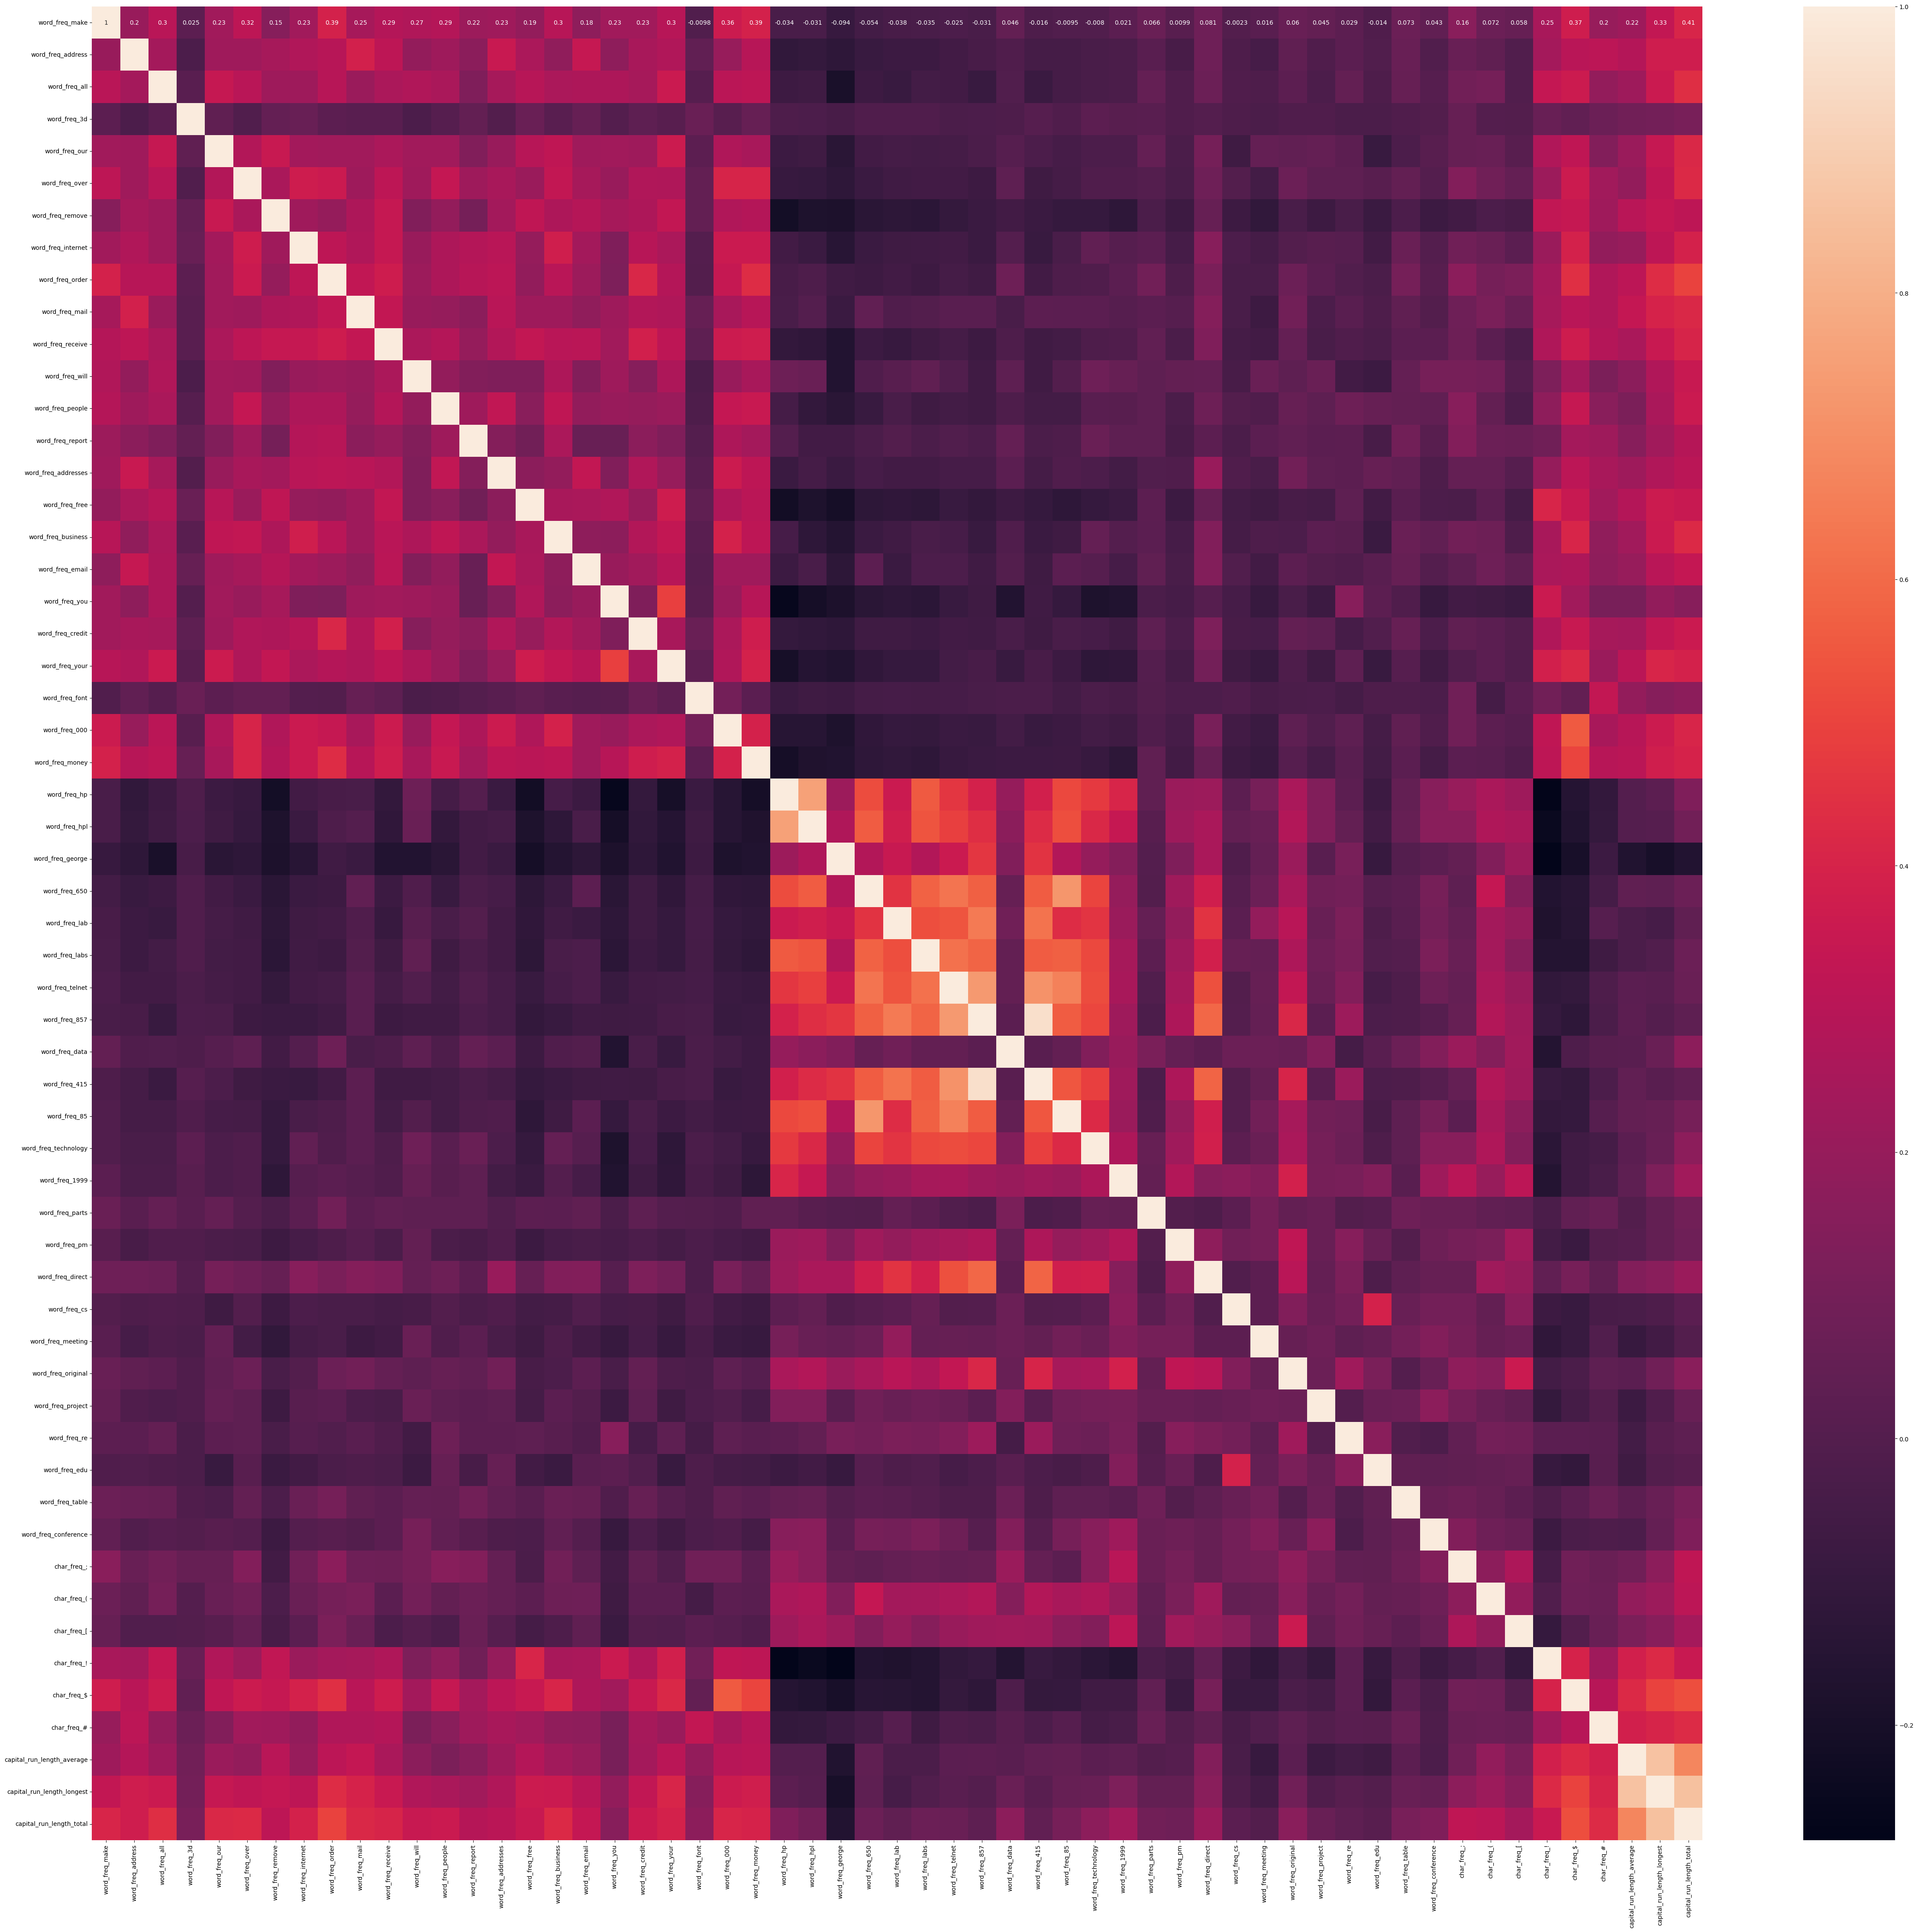

In [359]:
import seaborn as sns
new_df = data.iloc[:, :-1]
mask = np.zeros_like(new_df.corr(method='spearman'))
mask[np.triu_indices_from(mask)] = True

plt.rcParams.update({'figure.figsize':(60,55), 'figure.dpi':100})
prova = sns.heatmap(new_df.corr(method='spearman'), annot=True)
plt.show()